The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.

Link to the dataset:

https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data exploratory

In [ ]:
# Read in the data
data = pd.read_csv("Medical_insurance.csv")

In [ ]:
data.shape

(2772, 7)

In [ ]:
# head on the data
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# bottom 5 rows of the data
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [ ]:
# columns type
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Finding average price of insurance for males and females
average_price = data.groupby(['sex'])['charges']
average_price.mean()

sex
female    12486.831977
male      14013.872721
Name: charges, dtype: float64

We can see that males are charged higher on average than females

In [ ]:
average_price.count()

sex
female    1366
male      1406
Name: charges, dtype: int64

The number of females and males are not much different so we can confirm that male are charged higher for insurance than female

# Perform Machine Learning Regression

In [ ]:
# Seperate target variable
y = data['charges']

In [ ]:
# Remove target variable from orginal dataset
X = data.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast
2768,21,female,34.600,0,no,southwest
2769,19,male,26.030,1,yes,northwest
2770,23,male,18.715,0,no,northwest


## We need to preprocess the feature variables

For categorical variables, we need transform it into numerical labels and for numerical variables, we need to scale or standardize them so they can be of similar unit.

In [ ]:
label_encoded_data = X[['sex', 'smoker', 'region']]
label_encoded_data.head(5)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
# Label encoding will make each category become a numerical integer value
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()
# Fit and transform the categorical variable
for column in label_encoded_data.columns:
  label_encoded_data[column] = label_encoder.fit_transform(label_encoded_data[column])

<ipython-input-12-86728243291c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encoded_data[column] = label_encoder.fit_transform(label_encoded_data[column])
<ipython-input-12-86728243291c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encoded_data[column] = label_encoder.fit_transform(label_encoded_data[column])
<ipython-input-12-86728243291c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
label_encoded_data.head(5)

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [ ]:
standardized_data = X[['age','bmi','children']]
standardized_data.head(5)

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
# Initialize the data
scaler = StandardScaler()
# Scale the data
scale_data = scaler.fit_transform(standardized_data)

In [ ]:
# convert back to data frame
scaled_data = pd.DataFrame(scale_data, columns=standardized_data.columns)
scaled_data.head(5)

,age,bmi,children
0,-1.428353,-0.457114,-0.907084
1,-1.499381,0.500731,-0.083758
2,-0.789099,0.375085,1.562893
3,-0.433959,-1.304814,-0.907084
4,-0.504987,-0.297201,-0.907084


## **Merge 2 data frames together**

In [ ]:
X = pd.merge(label_encoded_data, scaled_data, left_index = True, right_index= True)

In [ ]:
X

,sex,smoker,region,age,bmi,children
0,0,1,3,-1.428353,-0.457114,-0.907084
1,1,0,2,-1.499381,0.500731,-0.083758
2,1,0,2,-0.789099,0.375085,1.562893
3,1,0,1,-0.433959,-1.304814,-0.907084
4,1,0,1,-0.504987,-0.297201,-0.907084
...,...,...,...,...,...,...
2767,0,0,2,0.560436,2.385417,-0.083758
2768,0,0,3,-1.286297,0.636167,-0.907084
2769,1,1,1,-1.428353,-0.762253,-0.083758
2770,1,0,1,-1.144240,-1.955887,-0.907084


## Split the data into test set and train set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [ ]:
X_train.shape

(2217, 6)

In [ ]:
y_train.shape

(2217,)

## Create a Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize the GradientBoostingRegressor
gradient = GradientBoostingRegressor()

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(gradient, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_gradient = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
print("Best regressor is : ", best_gradient)
print("Best parameters are", best_params)

Best regressor is :  GradientBoostingRegressor(max_depth=7, n_estimators=300)
Best parameters are {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [ ]:
# Make predictions on the test data using the best model
y_pred = best_gradient.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse_Gradient = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_Gradient)
print("Best Parameters:", best_params)

Root Mean Squared Error: 2607.5125683487067
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


## Create a Support Vector Regression model

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Initialize the SVR
SupportVector = SVR()

In [ ]:
param_grid1 = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [.1, .01, .001]
}

In [ ]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(SupportVector, param_grid1, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model and its parameters
best_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
# Make predictions on the test data using the best model
y_pred = best_regressor.predict(X_test)

In [ ]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse_SVR = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_SVR)
print("Best Parameters:", best_params)

Root Mean Squared Error: 11331.3113590534
Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


## Create a Neural Network Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create a neural network model
model = Sequential()

''' Add input layer and hidden layers. input_dim = number of feature variables.
Number 6 after Dense are number of neurons and it should not exceed number of input variables'''
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu')) # hidden layer

# Add output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

Epoch 1/100
2217/2217 [==============================] - 6s 2ms/step - loss: 316161984.0000
Epoch 2/100
2217/2217 [==============================] - 4s 2ms/step - loss: 244481088.0000
Epoch 3/100
2217/2217 [==============================] - 5s 2ms/step - loss: 161929264.0000
Epoch 4/100
2217/2217 [==============================] - 4s 2ms/step - loss: 130546144.0000
Epoch 5/100
2217/2217 [==============================] - 4s 2ms/step - loss: 119413080.0000
Epoch 6/100
2217/2217 [==============================] - 5s 2ms/step - loss: 110936616.0000
Epoch 7/100
2217/2217 [==============================] - 3s 2ms/step - loss: 102800248.0000
Epoch 8/100
2217/2217 [==============================] - 3s 2ms/step - loss: 94813872.0000
Epoch 9/100
2217/2217 [==============================] - 3s 1ms/step - loss: 86822296.0000
Epoch 10/100
2217/2217 [==============================] - 4s 2ms/step - loss: 79048408.0000
Epoch 11/100
2217/2217 [==============================] - 3s 1ms/step - loss: 7149

In [ ]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse_neural_net = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_neural_net)

Root Mean Squared Error: 5700.765524977743


## Question 1: What is the best model and how is its predictions

In [ ]:
''' To identify the best model for this project, I am using a rmse as a main measurement index'''
print('Gradient Boosting model rmse:', round(rmse_Gradient,3))
print('SVR model rmse:', round(rmse_SVR,3))
print('Neural Network rmse:', round(rmse_neural_net,3))

Gradient Boosting model rmse: 2607.513
SVR model rmse: 11331.311
Neural Network rmse: 5700.766


As we see above, the best model based on the best rmse metric is Gradient Boosting. We can see that on average, its predictions miss by $2607.513

## Question 2: What are the 3 most important features variables and what can we do about it.

In [ ]:
feature_importance = best_gradient.feature_importances_

In [ ]:
# Sort the feature in a descending order to find the most important variables
sorted_feature = feature_importance.argsort()[::-1]

In [ ]:
# Specify number of features to display:
num_top_variables = 5

In [ ]:
top_variables = X.columns[sorted_feature[:num_top_variables]] # select 0 -5 variable from sorted_feature
top_scores = feature_importance[sorted_feature[:num_top_variables]]

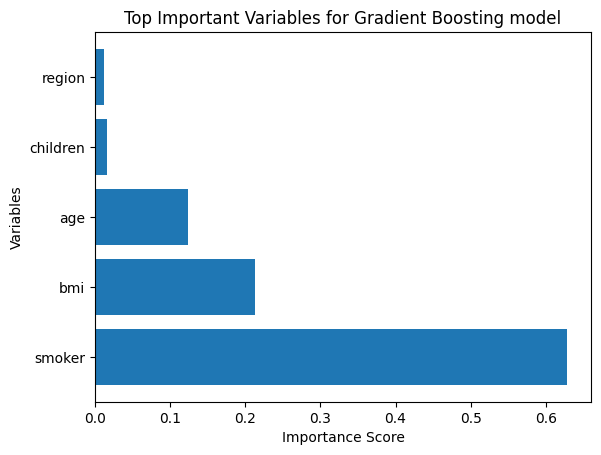

In [ ]:
plt.barh(np.arange(num_top_variables), top_scores, align='center') # it takes y first, then x
plt.yticks(np.arange(num_top_variables), top_variables) # add labels on the y axis
plt.xlabel('Importance Score')
plt.ylabel('Variables')
plt.title('Top Important Variables for Gradient Boosting model')
plt.show()

Base on this model, we can confidently say that whether a person smokes or not really impacts the outcome of this model. We can assume that if a person smokes, the price of medical insurance will be higher then someone who does not. We can then continue to market our Medical plan to 2 type of customer, one who smokes, and the one who does not.